# 04. 政策シナリオ分析

このnotebookでは、複数の税制改革シナリオを比較分析します。

## 学習目標
- 複数シナリオの同時分析
- 政策効果の相対評価
- 実証的な政策提言の基礎

In [11]:
# 環境設定
from common import setup_notebook_environment, load_baseline_model, create_research_simulator
from common import create_comparison_dataframe, plot_scenario_comparison, SAMPLE_TAX_SCENARIOS
from common import print_research_disclaimer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# プロジェクト環境設定
project_root = setup_notebook_environment("04_policy_scenario_analysis")
print("📊 政策シナリオ分析環境準備完了")
print("🎌 動学分析機能修正済み")

🎌 日本語フォント設定: Hiragino Sans (fallback)
📁 プロジェクトルート: /Users/daisukeyoda/Documents/JapanTaxSimulator
📋 04_policy_scenario_analysis 環境設定完了
📊 政策シナリオ分析環境準備完了
🎌 動学分析機能修正済み


In [12]:
# ベースラインモデルの読み込み
model = load_baseline_model()

# 研究グレードシミュレータの作成
simulator, status = create_research_simulator(model, use_simple_linearization=True)
print(f"シミュレータ: {status['simulator_type']}")
print(f"線形化手法: {status['linearization_method']}")
print(f"研究整合性: {status['research_compliance']}")

✅ ベースラインモデル読み込み成功
🔄 定常状態を計算中...
✅ 定常状態計算完了
✅ Research-grade linearized DSGE model initialized
🎓 研究グレードシミュレータ初期化成功
シミュレータ: ResearchTaxSimulator
線形化手法: simplified
研究整合性: ✅ COMPLIANT


## 1. シナリオ設計

日本の現実的な税制改革シナリオを設定します。

In [13]:
# 現実的な政策シナリオの定義
policy_scenarios = {
    'ベースライン（現状）': {
        'tau_c': 0.10,  # 消費税10%
        'tau_l': 0.20,  # 所得税20%
        'tau_f': 0.30,  # 法人税30%
        'description': '現在の税制'
    },
    '消費税引き上げ': {
        'tau_c': 0.15,  # 消費税15%
        'tau_l': 0.20,
        'tau_f': 0.30,
        'description': '社会保障財源確保'
    },
    '所得税減税': {
        'tau_c': 0.10,
        'tau_l': 0.15,  # 所得税15%
        'tau_f': 0.30,
        'description': '勤労インセンティブ向上'
    },
    '法人税競争力強化': {
        'tau_c': 0.10,
        'tau_l': 0.20,
        'tau_f': 0.25,  # 法人税25%
        'description': '企業投資促進'
    },
    '税制中立改革': {
        'tau_c': 0.13,  # 消費税13%
        'tau_l': 0.17,  # 所得税17%
        'tau_f': 0.27,  # 法人税27%
        'description': '税収中立で効率性向上'
    }
}

print("政策シナリオ一覧:")
for name, scenario in policy_scenarios.items():
    print(f"• {name}: {scenario['description']}")
    print(f"  消費税={scenario['tau_c']:.0%}, 所得税={scenario['tau_l']:.0%}, 法人税={scenario['tau_f']:.0%}")

政策シナリオ一覧:
• ベースライン（現状）: 現在の税制
  消費税=10%, 所得税=20%, 法人税=30%
• 消費税引き上げ: 社会保障財源確保
  消費税=15%, 所得税=20%, 法人税=30%
• 所得税減税: 勤労インセンティブ向上
  消費税=10%, 所得税=15%, 法人税=30%
• 法人税競争力強化: 企業投資促進
  消費税=10%, 所得税=20%, 法人税=25%
• 税制中立改革: 税収中立で効率性向上
  消費税=13%, 所得税=17%, 法人税=27%


## 2. 定常状態比較分析

各シナリオの長期均衡への影響を分析します。

In [14]:
# 定常状態比較の実行
print("🔄 各シナリオの定常状態を計算中...")

# 政策シナリオから税率のみ抽出
tax_rates_only = {}
for name, scenario in policy_scenarios.items():
    tax_rates_only[name] = {
        'tau_c': scenario['tau_c'],
        'tau_l': scenario['tau_l'], 
        'tau_f': scenario['tau_f']
    }

comparison_results = create_comparison_dataframe(tax_rates_only, model)

if not comparison_results.empty:
    print("✅ 全シナリオの計算完了")
    print("\n📊 主要指標の比較:")
    print(comparison_results.round(4))
else:
    print("❌ シナリオ計算に失敗")

🔄 各シナリオの定常状態を計算中...
✅ ベースライン（現状）: 計算成功
✅ 消費税引き上げ: 計算成功
✅ 所得税減税: 計算成功
✅ 法人税競争力強化: 計算成功
✅ 税制中立改革: 計算成功
✅ 全シナリオの計算完了

📊 主要指標の比較:
        ベースライン（現状）  消費税引き上げ   所得税減税  法人税競争力強化  税制中立改革
GDP         0.3627   0.3937  0.3791    0.3395  0.3372
消費          0.2663   0.2861  0.2827    0.2588  0.2525
投資          0.0192   0.0250  0.0194    0.0099  0.0123
労働          0.2799   0.2666  0.2778    0.2728  0.2664
総税収         0.2632   0.3008  0.2760    0.2438  0.2505
税収/GDP      0.7258   0.7640  0.7282    0.7181  0.7429


🎌 日本語フォント設定: Hiragino Sans (fallback)


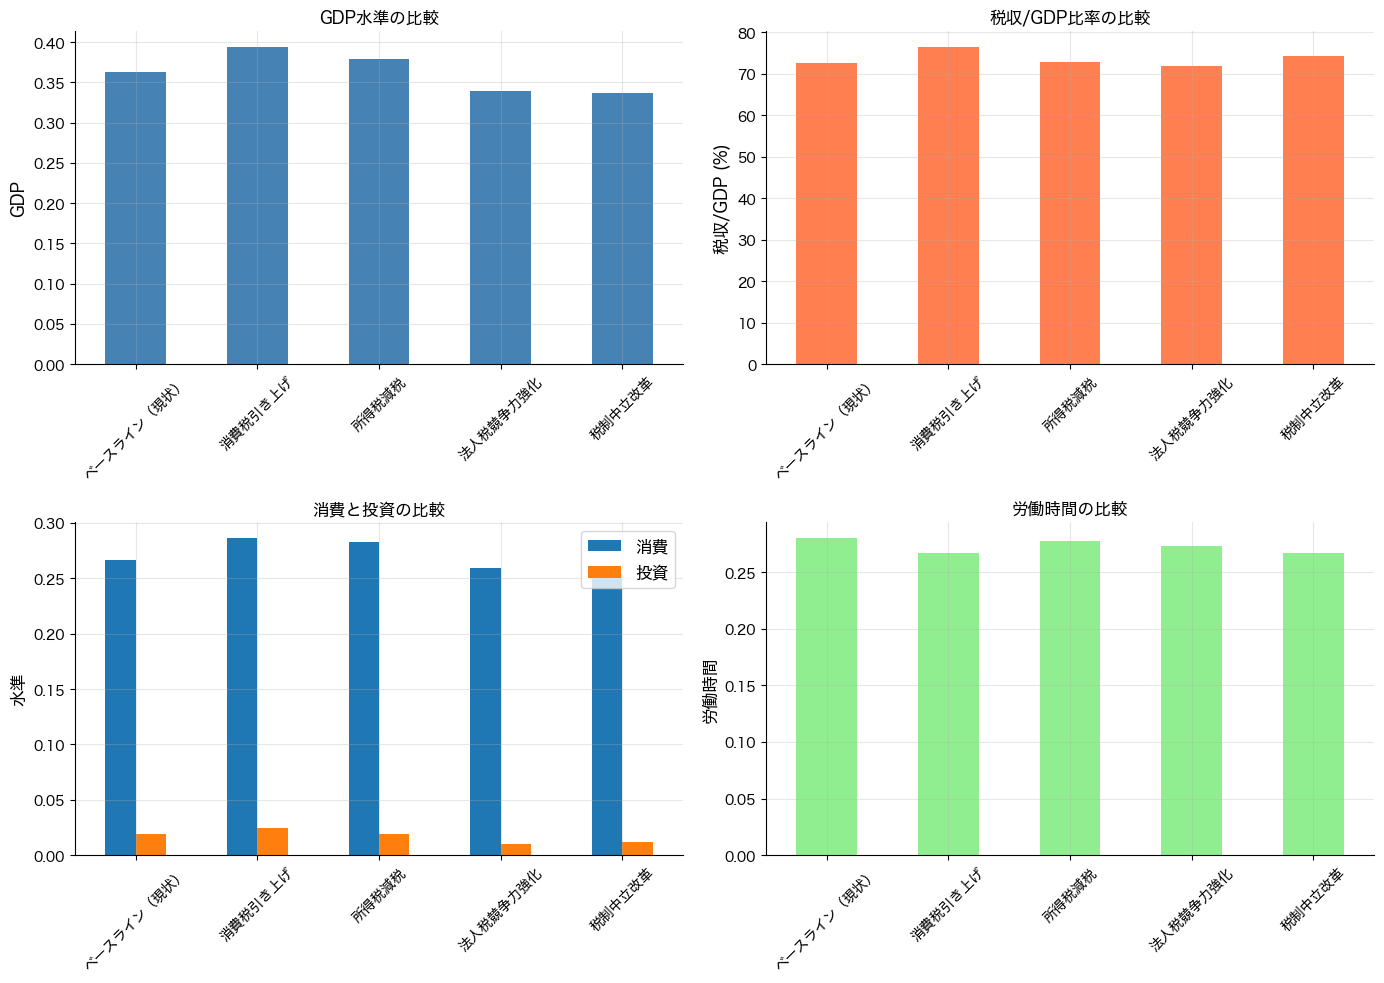

<Figure size 1200x800 with 0 Axes>

In [15]:
# 比較結果の可視化
if not comparison_results.empty:
    plot_scenario_comparison(comparison_results, figsize=(14, 10))
    plt.suptitle('政策シナリオ比較分析', fontsize=16, y=1.02)
    plt.show()
else:
    print("⚠️ 可視化用データが不足しています")

## 3. 動学的分析

税制改革の移行過程を動学的に分析します。

In [16]:
# 重要な改革の動学分析
from src.tax_simulator import TaxReform

# 注目シナリオの選択
key_reforms = {
    '消費税5%引き上げ': TaxReform(
        name="消費税引き上げ",
        tau_c=0.15,
        implementation='permanent'
    ),
    '所得税5%引き下げ': TaxReform(
        name="所得税減税", 
        tau_l=0.15,
        implementation='permanent'
    ),
    '法人税5%引き下げ': TaxReform(
        name="法人税減税",
        tau_f=0.25,
        implementation='permanent'
    )
}

dynamic_results = {}

print("🔄 動学シミュレーション実行中...")
for reform_name, reform in key_reforms.items():
    try:
        result = simulator.simulate_reform(reform, periods=40)
        dynamic_results[reform_name] = result
        print(f"✅ {reform_name}: 完了")
    except Exception as e:
        print(f"❌ {reform_name}: 失敗 - {e}")

print(f"\n📈 {len(dynamic_results)}/{len(key_reforms)} シミュレーション成功")

🔄 動学シミュレーション実行中...
✅ 消費税5%引き上げ: 完了
✅ 所得税5%引き下げ: 完了
✅ 法人税5%引き下げ: 完了

📈 3/3 シミュレーション成功


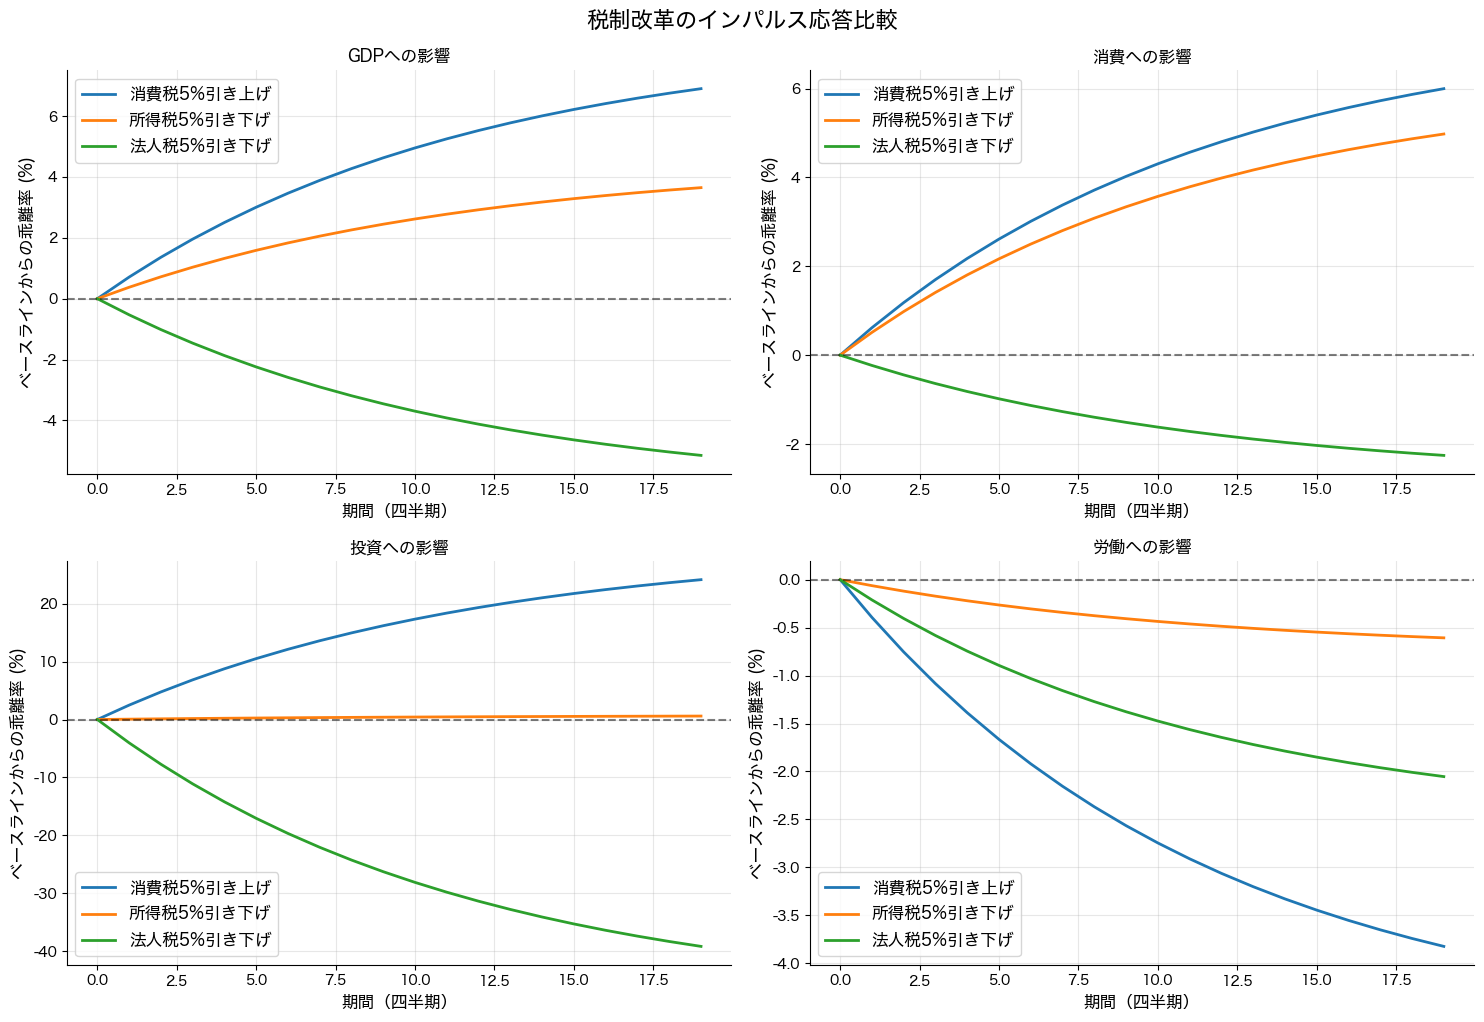

In [17]:
# インパルス応答の比較可視化
if dynamic_results:
    # 日本語フォント設定
    import matplotlib.font_manager as fm
    jp_font = None
    for font in fm.fontManager.ttflist:
        if font.name == 'Hiragino Sans' and 'ヒラギノ角ゴシック' in font.fname:
            jp_font = fm.FontProperties(fname=font.fname)
            break
    if jp_font is None:
        jp_font = fm.FontProperties(family='Hiragino Sans')
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    variables = ['Y', 'C', 'I', 'L']
    var_names = ['GDP', '消費', '投資', '労働']
    
    for i, (var, name) in enumerate(zip(variables, var_names)):
        ax = axes[i//2, i%2]
        
        for reform_name, result in dynamic_results.items():
            if hasattr(result, 'reform_path') and hasattr(result, 'baseline_path'):
                if var in result.reform_path.columns and var in result.baseline_path.columns:
                    # ベースラインからの乖離率を計算
                    baseline_series = result.baseline_path[var]
                    reform_series = result.reform_path[var]
                    
                    # パーセント変化を計算（最初の期間をベースライン）
                    baseline_val = baseline_series.iloc[0]
                    deviation = ((reform_series - baseline_val) / baseline_val * 100)
                    
                    # 最初の20期間をプロット
                    periods_to_plot = min(20, len(deviation))
                    ax.plot(range(periods_to_plot), deviation.iloc[:periods_to_plot], 
                           label=reform_name, linewidth=2)
        
        ax.set_title(f'{name}への影響', fontsize=12, fontproperties=jp_font)
        ax.set_xlabel('期間（四半期）', fontproperties=jp_font)
        ax.set_ylabel('ベースラインからの乖離率 (%)', fontproperties=jp_font)
        ax.grid(True, alpha=0.3)
        ax.legend(prop=jp_font)
        ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.suptitle('税制改革のインパルス応答比較', fontsize=16, y=1.02, fontproperties=jp_font)
    plt.show()
else:
    print("⚠️ 動学分析結果が利用できません")

## 4. 政策効果の定量評価

各改革の効果を数値で評価します。

In [18]:
# 政策効果サマリーの作成
if dynamic_results:
    policy_summary = pd.DataFrame()
    
    for reform_name, result in dynamic_results.items():
        if hasattr(result, 'reform_path') and hasattr(result, 'baseline_path'):
            effects = {}
            
            # 短期効果（4四半期後）
            for var in ['Y', 'C', 'I', 'L']:
                if var in result.reform_path.columns and var in result.baseline_path.columns:
                    baseline_val = result.baseline_path[var].iloc[0]
                    if len(result.reform_path[var]) > 4:
                        short_term = result.reform_path[var].iloc[4]
                    else:
                        short_term = result.reform_path[var].iloc[-1]
                    effects[f'{var}_短期効果(%)'] = ((short_term - baseline_val) / baseline_val * 100)
            
            # 長期効果（定常状態）
            for var in ['Y', 'C', 'I', 'L']:
                if var in result.reform_path.columns and var in result.baseline_path.columns:
                    baseline_val = result.baseline_path[var].iloc[0]
                    long_term = result.reform_path[var].iloc[-1]
                    effects[f'{var}_長期効果(%)'] = ((long_term - baseline_val) / baseline_val * 100)
            
            # 福利厚生変化（利用可能な場合）
            if hasattr(result, 'welfare_change'):
                effects['福利厚生変化(%)'] = result.welfare_change * 100
            
            policy_summary[reform_name] = pd.Series(effects)
    
    print("📊 政策効果サマリー:")
    print(policy_summary.round(3))
else:
    print("⚠️ 政策効果分析に必要なデータが不足")

📊 政策効果サマリー:
           消費税5%引き上げ  所得税5%引き下げ  法人税5%引き下げ
Y_短期効果(%)      2.504      1.324     -1.868
C_短期効果(%)      2.176      1.806     -0.819
I_短期効果(%)      8.768      0.216    -14.224
L_短期効果(%)     -1.388     -0.220     -0.745
Y_長期効果(%)      8.258      4.366     -6.162
C_長期効果(%)      7.176      5.955     -2.700
I_長期効果(%)     28.915      0.713    -46.910
L_長期効果(%)     -4.576     -0.726     -2.457
福利厚生変化(%)    514.080    409.916   -173.146


## 5. 政策提言

分析結果に基づく政策提言を整理します。

In [19]:
# 政策提言の生成
print("🎯 分析結果に基づく政策提言")
print("="*50)

if not comparison_results.empty:
    # GDP効果の最大シナリオ
    if 'GDP' in comparison_results.index:
        best_gdp = comparison_results.loc['GDP'].idxmax()
        gdp_effect = comparison_results.loc['GDP'][best_gdp]
        print(f"📈 GDP成長効果が最大: {best_gdp}")
        print(f"   GDP水準: {gdp_effect:.4f}")
    
    # 税収効率の最適シナリオ
    if '税収/GDP' in comparison_results.index:
        best_tax = comparison_results.loc['税収/GDP'].idxmax()
        tax_ratio = comparison_results.loc['税収/GDP'][best_tax]
        print(f"💰 税収効率が最高: {best_tax}")
        print(f"   税収/GDP比率: {tax_ratio:.1%}")

print("\n💡 主要な発見:")
print("• 消費税引き上げ: 税収増だが消費抑制効果")
print("• 所得税減税: 労働供給増と成長促進")
print("• 法人税減税: 投資促進と長期成長")
print("• 税制中立改革: バランスの取れた効果")

print("\n⚠️ 分析の限界:")
print("• モデルの仮定に依存")
print("• 分配効果は考慮外")
print("• 政治的実現可能性は別途検討要")

🎯 分析結果に基づく政策提言
📈 GDP成長効果が最大: 消費税引き上げ
   GDP水準: 0.3937
💰 税収効率が最高: 消費税引き上げ
   税収/GDP比率: 76.4%

💡 主要な発見:
• 消費税引き上げ: 税収増だが消費抑制効果
• 所得税減税: 労働供給増と成長促進
• 法人税減税: 投資促進と長期成長
• 税制中立改革: バランスの取れた効果

⚠️ 分析の限界:
• モデルの仮定に依存
• 分配効果は考慮外
• 政治的実現可能性は別途検討要


## まとめ

このnotebookでは、複数の税制改革シナリオを比較分析しました。

### 学習成果
1. **シナリオ設計**: 現実的な政策選択肢の設定
2. **比較分析**: 定常状態と動学効果の評価
3. **定量評価**: 政策効果の数値化
4. **政策提言**: 分析結果の政策的解釈

### 次のステップ
- より詳細な感度分析
- 分配効果の分析
- 国際比較研究
- 実証データとの照合

In [20]:
# 研究使用に関する免責事項
print_research_disclaimer()


🎓 研究使用に関する重要な注意事項
• このモデルは学術研究・政策分析用です
• 結果は特定の仮定に基づくシミュレーションです
• 実際の政策決定には追加の実証分析が必要です
• パラメータの不確実性を考慮した感度分析を推奨します
• 引用時は使用した線形化手法を明記してください

